In [1]:
import xarray as xr 
import numpy as np
import matplotlib.pyplot as plt
from math import nan
import pandas as pd

from qtrendutils import filter_utils as filt
from qtrendutils import averaging_utils as avg
from qtrendutils import calendar_utils as cal
from qtrendutils import linfit_utils as linfit

import sys
plt.rc('font', family='Arial')

import scipy.stats as stats

In [2]:
plotpath="/project/cas/islas/python_plots/qtrend_paper/figures/"

#### Observations, global averages

In [3]:
basepath="/project/cas/islas/python_savs/qtrend_paper/DATA_SORT/global_avgs/"
era5_q = xr.open_dataset(basepath+"ERA5_q.nc")*1000.
era5_q = era5_q.sel(time=slice("1980-01-01","2020-12-31"))
era5_q_anoms = era5_q - era5_q.sel(time=slice("1980-01-01","1990-12-31")).mean('time')
era5_q_12m = filt.runningmean(era5_q_anoms, 12, timeaxis='time', dropna=False)
era5_q_am = cal.calcannualmean(era5_q_anoms)
timemonth = np.arange(0,era5_q.time.size,1)*(1./12.) + 1980

era5_relhum = xr.open_dataset(basepath+"ERA5_relhum.nc")
era5_relhum = era5_relhum.sel(time=slice("1980-01-01","2020-12-31"))
era5_relhum_anoms = era5_relhum - era5_relhum.sel(time=slice("1980-01-01","1990-12-31")).mean('time')
era5_relhum_12m = filt.runningmean(era5_relhum_anoms, 12, timeaxis='time', dropna=False)
era5_relhum_am = cal.calcannualmean(era5_relhum_anoms)

era5_t = xr.open_dataset(basepath+"ERA5_tas.nc")
era5_t = era5_t.sel(time=slice("1980-01-01","2020-12-31"))
era5_t_anoms = era5_t - era5_t.sel(time=slice("1980-01-01","1990-12-31")).mean('time')
era5_t_12m = filt.runningmean(era5_t_anoms, 12, timeaxis='time', dropna=False)
era5_t_am = cal.calcannualmean(era5_t_anoms)

best_t = xr.open_dataset(basepath+"BEST_tas.nc")
best_t = best_t.sel(time=slice("1980-01-01","2020-12-31"))
best_t_anoms = best_t - best_t.sel(time=slice("1980-01-01","1990-12-31")).mean('time')
best_t_12m = filt.runningmean(best_t_anoms, 12, timeaxis='time', dropna=False)
best_t_am = cal.calcannualmean(best_t_anoms)

### CMIP, global averages

In [4]:
cmip6_q = xr.open_dataset(basepath+'CMIP6_q.nc')*1000.
cmip6_q = cmip6_q.sel(time=slice("1980-01-01","2020-12-31"))
cmip6_q_anoms = cmip6_q - cmip6_q.sel(time=slice("1980-01-01","1990-12-31")).mean('time')
cmip6_q_12m = filt.runningmean(cmip6_q_anoms, 12, timeaxis='time', dropna=False)
cmip6_q_am = cal.calcannualmean(cmip6_q_anoms)
timemonth_cmip = np.arange(0,cmip6_q.time.size,1)*(1./12.) + 1980
cmip6_q_memm = cmip6_q_12m.mean('member')
cmip6_q_em = cmip6_q_memm.mean('model')

cmip6_t = xr.open_dataset(basepath+'CMIP6_tas.nc')
cmip6_t = cmip6_t.sel(time=slice("1980-01-01","2020-12-31"))
cmip6_t_anoms = cmip6_t - cmip6_t.sel(time=slice("1980-01-01","1990-12-31")).mean('time')
cmip6_t_12m = filt.runningmean(cmip6_t_anoms, 12, timeaxis='time', dropna=False)
cmip6_t_am = cal.calcannualmean(cmip6_t_anoms)
timemonth_cmip = np.arange(0,cmip6_t.time.size,1)*(1./12.) + 1980
cmip6_t_memm = cmip6_t_12m.mean('member')
cmip6_t_em = cmip6_t_memm.mean('model')

cmip6_relhum = xr.open_dataset(basepath+'CMIP6_relhum.nc')
cmip6_relhum = cmip6_relhum.sel(time=slice("1980-01-01","2020-12-31"))
cmip6_relhum_anoms = cmip6_relhum - cmip6_relhum.sel(time=slice("1980-01-01","1990-12-31")).mean('time')
cmip6_relhum_12m = filt.runningmean(cmip6_relhum_anoms, 12, timeaxis='time', dropna=False)
cmip6_relhum_am = cal.calcannualmean(cmip6_relhum_anoms)
timemonth_cmip = np.arange(0,cmip6_relhum.time.size,1)*(1./12.) + 1980
cmip6_relhum_memm = cmip6_relhum_12m.mean('member')
cmip6_relhum_em = cmip6_relhum_memm.mean('model')


cmip6_q_12m_stack = cmip6_q_12m.stack(z=('member','model'))
cmip6_q_12m_stack = cmip6_q_12m_stack.where( ~np.isnan(cmip6_q_12m_stack.isel(time=240)), drop=True)

cmip6_t_12m_stack = cmip6_t_12m.stack(z=('member','model'))
cmip6_t_12m_stack = cmip6_t_12m_stack.where( ~np.isnan(cmip6_t_12m_stack.isel(time=240)), drop=True)

cmip6_relhum_12m_stack = cmip6_relhum_12m.stack(z=('member','model'))
cmip6_relhum_12m_stack = cmip6_relhum_12m_stack.where( ~np.isnan(cmip6_relhum_12m_stack.isel(time=240)), drop=True)


cmip6_q_am_stack = cmip6_q_am.stack(z=('member','model'))
cmip6_q_am_stack = cmip6_q_am_stack.dropna('z')

cmip6_t_am_stack = cmip6_t_am.stack(z=('member','model'))
cmip6_t_am_stack = cmip6_t_am_stack.dropna('z')

cmip6_relhum_am_stack = cmip6_relhum_am.stack(z=('member','model'))
cmip6_relhum_am_stack = cmip6_relhum_am_stack.dropna('z')

### AMIP6, global averages

In [5]:
amip6_q = xr.open_dataset(basepath+'AMIP6_q.nc')*1000.
amip6_q = amip6_q.drop_sel(model=['FGOALS-g3','CMCC-CM2-HR4']) #!!!FIX THIS
amip6_q = amip6_q.sel(time=slice("1980-01-01","2020-12-31"))
amip6_q_anoms = amip6_q - amip6_q.sel(time=slice("1980-01-01","1990-12-31")).mean('time')
amip6_q_12m = filt.runningmean(amip6_q_anoms, 12, timeaxis='time', dropna=False)
amip6_q_am = cal.calcannualmean(amip6_q_anoms)
timemonth_amip = np.arange(0,amip6_q.time.size,1)*(1./12.) + 1980
amip6_q_memm = amip6_q_12m.mean('member')
amip6_q_em = amip6_q_memm.mean('model')

amip6_t = xr.open_dataset(basepath+'AMIP6_tas.nc')
amip6_t = amip6_t.drop_sel(model=['FGOALS-g3','CMCC-CM2-HR4'])
amip6_t = amip6_t.sel(time=slice("1980-01-01","2020-12-31"))
amip6_t_anoms = amip6_t - amip6_t.sel(time=slice("1980-01-01","1990-12-31")).mean('time')
amip6_t_12m = filt.runningmean(amip6_t_anoms, 12, timeaxis='time', dropna=False)
amip6_t_am = cal.calcannualmean(amip6_t_anoms)
timemonth_amip = np.arange(0,amip6_t.time.size,1)*(1./12.) + 1980
amip6_t_memm = amip6_t_12m.mean('member')
amip6_t_em = amip6_t_memm.mean('model')

amip6_relhum = xr.open_dataset(basepath+'AMIP6_relhum.nc')
amip6_relhum = amip6_relhum.drop_sel(model=['FGOALS-g3','CMCC-CM2-HR4'])
amip6_relhum = amip6_relhum.sel(time=slice("1980-01-01","2020-12-31"))
amip6_relhum_anoms = amip6_relhum - amip6_relhum.sel(time=slice("1980-01-01","1990-12-31")).mean('time')
amip6_relhum_12m = filt.runningmean(amip6_relhum_anoms, 12, timeaxis='time', dropna=False)
amip6_relhum_am = cal.calcannualmean(amip6_relhum_anoms)
timemonth_amip = np.arange(0,amip6_relhum.time.size,1)*(1./12.) + 1980
amip6_relhum_memm = amip6_relhum_12m.mean('member')
amip6_relhum_em = amip6_relhum_memm.mean('model')


amip6_q_12m_stack = amip6_q_12m.stack(z=('member','model'))
amip6_q_12m_stack = amip6_q_12m_stack.where( ~np.isnan(amip6_q_12m_stack.isel(time=240)), drop=True)

amip6_t_12m_stack = amip6_t_12m.stack(z=('member','model'))
amip6_t_12m_stack = amip6_t_12m_stack.where( ~np.isnan(amip6_t_12m_stack.isel(time=240)), drop=True)

amip6_relhum_12m_stack = amip6_relhum_12m.stack(z=('member','model'))
amip6_relhum_12m_stack = amip6_relhum_12m_stack.where( ~np.isnan(amip6_relhum_12m_stack.isel(time=240)), drop=True)

amip6_q_am_stack = amip6_q_am.stack(z=('member','model'))
amip6_q_am_stack = amip6_q_am_stack.dropna('z')

amip6_t_am_stack = amip6_t_am.stack(z=('member','model'))
amip6_t_am_stack = amip6_t_am_stack.dropna('z')

amip6_relhum_am_stack = amip6_relhum_am.stack(z=('member','model'))
amip6_relhum_am_stack = amip6_relhum_am_stack.dropna('z')

### LENS2 and GOGA2

In [6]:
lens2_q = xr.open_dataset(basepath+'LENS2_q.nc')*1000.
lens2_q = lens2_q.sel(time=slice("1980-01-01","2020-12-31"))
lens2_q_anoms = lens2_q - lens2_q.sel(time=slice("1980-01-01","1990-12-31")).mean('time')
lens2_q_12m = filt.runningmean(lens2_q_anoms, 12, timeaxis='time', dropna=False)
lens2_q_am = cal.calcannualmean(lens2_q_anoms)
timemonth_lens2 = np.arange(0,lens2_q.time.size,1)*(1./12.) + 1980

lens2_t = xr.open_dataset(basepath+'LENS2_tas.nc')
lens2_t = lens2_t.sel(time=slice("1980-01-01","2020-12-31"))
lens2_t_anoms = lens2_t - lens2_t.sel(time=slice("1980-01-01","1990-12-31")).mean('time')
lens2_t_12m = filt.runningmean(lens2_t_anoms, 12, timeaxis='time', dropna=False)
lens2_t_am = cal.calcannualmean(lens2_t_anoms)

lens2_relhum = xr.open_dataset(basepath+'LENS2_relhum.nc')
lens2_relhum = lens2_relhum.sel(time=slice("1980-01-01","2020-12-31"))
lens2_relhum_anoms = lens2_relhum - lens2_relhum.sel(time=slice("1980-01-01","1990-12-31")).mean('time')
lens2_relhum_12m = filt.runningmean(lens2_relhum_anoms, 12, timeaxis='time', dropna=False)
lens2_relhum_am = cal.calcannualmean(lens2_relhum_anoms)



goga2_q = xr.open_dataset(basepath+'GOGA2_q.nc')*1000.
goga2_q = goga2_q.sel(time=slice("1980-01-01","2020-12-31"))
goga2_q_anoms = goga2_q - goga2_q.sel(time=slice("1980-01-01","1990-12-31")).mean('time')
goga2_q_12m = filt.runningmean(goga2_q_anoms, 12, timeaxis='time', dropna=False)
goga2_q_am = cal.calcannualmean(goga2_q_anoms)
timemonth_goga2 = np.arange(0,goga2_q.time.size,1)*(1./12.) + 1980

goga2_t = xr.open_dataset(basepath+'GOGA2_tas.nc')
goga2_t = goga2_t.sel(time=slice("1980-01-01","2020-12-31"))
goga2_t_anoms = goga2_t - goga2_t.sel(time=slice("1980-01-01","1990-12-31")).mean('time')
goga2_t_12m = filt.runningmean(goga2_t_anoms, 12, timeaxis='time', dropna=False)
goga2_t_am = cal.calcannualmean(goga2_t_anoms)

goga2_relhum = xr.open_dataset(basepath+'GOGA2_relhum.nc')
goga2_relhum = goga2_relhum.sel(time=slice("1980-01-01","2020-12-31"))
goga2_relhum_anoms = goga2_relhum - goga2_relhum.sel(time=slice("1980-01-01","1990-12-31")).mean('time')
goga2_relhum_am = cal.calcannualmean(goga2_relhum_anoms)
goga2_relhum_12m = filt.runningmean(goga2_relhum_anoms, 12, timeaxis='time', dropna=False)

### Calculate the trends

In [7]:
trend_era5_q = xr.apply_ufunc(linfit.compute_slope, era5_q_am, vectorize=True, input_core_dims=[['year']])*era5_q_am.year.size
trend_era5_t = xr.apply_ufunc(linfit.compute_slope, era5_t_am, vectorize=True, input_core_dims=[['year']])*era5_q_am.year.size
trend_era5_relhum = xr.apply_ufunc(linfit.compute_slope, era5_relhum_am, vectorize=True, input_core_dims=[['year']])*era5_q_am.year.size
trend_best_t = xr.apply_ufunc(linfit.compute_slope, best_t_am, vectorize=True, input_core_dims=[['year']])*best_t_am.year.size

trend_era5_q_2014 = xr.apply_ufunc(linfit.compute_slope, era5_q_am.sel(year=slice(1980,2014)), vectorize=True, input_core_dims=[['year']])*era5_q_am.year.size
trend_era5_t_2014 = xr.apply_ufunc(linfit.compute_slope, era5_t_am.sel(year=slice(1980,2014)), vectorize=True, input_core_dims=[['year']])*era5_q_am.year.size
trend_era5_relhum_2014 = xr.apply_ufunc(linfit.compute_slope, era5_relhum_am.sel(year=slice(1980,2014)), vectorize=True, input_core_dims=[['year']])*era5_q_am.year.size
trend_best_t_2014 = xr.apply_ufunc(linfit.compute_slope, best_t_am.sel(year=slice(1980,2014)), vectorize=True, input_core_dims=[['year']])*best_t_am.year.size

trend_cmip6_q = xr.apply_ufunc(linfit.compute_slope, cmip6_q_am, vectorize=True, input_core_dims=[['year']])*era5_q_am.year.size
trend_cmip6_t = xr.apply_ufunc(linfit.compute_slope, cmip6_t_am, vectorize=True, input_core_dims=[['year']])*era5_q_am.year.size
trend_cmip6_relhum = xr.apply_ufunc(linfit.compute_slope, cmip6_relhum_am, vectorize=True, input_core_dims=[['year']])*era5_q_am.year.size

trend_cmip6_q_2014 = xr.apply_ufunc(linfit.compute_slope, cmip6_q_am.sel(year=slice(1980,2014)), vectorize=True, input_core_dims=[['year']])*era5_q_am.year.size
trend_cmip6_t_2014 = xr.apply_ufunc(linfit.compute_slope, cmip6_t_am.sel(year=slice(1980,2014)), vectorize=True, input_core_dims=[['year']])*era5_q_am.year.size
trend_cmip6_relhum_2014 = xr.apply_ufunc(linfit.compute_slope, cmip6_relhum_am.sel(year=slice(1980,2014)), vectorize=True, input_core_dims=[['year']])*era5_q_am.year.size

trend_amip6_q = xr.apply_ufunc(linfit.compute_slope, amip6_q_am, vectorize=True, input_core_dims=[['year']])*era5_q_am.year.size
trend_amip6_t = xr.apply_ufunc(linfit.compute_slope, amip6_t_am, vectorize=True, input_core_dims=[['year']])*era5_q_am.year.size
trend_amip6_relhum = xr.apply_ufunc(linfit.compute_slope, amip6_relhum_am, vectorize=True, input_core_dims=[['year']])*era5_q_am.year.size

trend_lens2_q = xr.apply_ufunc(linfit.compute_slope, lens2_q_am, vectorize=True, input_core_dims=[['year']])*era5_q_am.year.size
trend_lens2_t = xr.apply_ufunc(linfit.compute_slope, lens2_t_am, vectorize=True, input_core_dims=[['year']])*era5_q_am.year.size
trend_lens2_relhum = xr.apply_ufunc(linfit.compute_slope, lens2_relhum_am, vectorize=True, input_core_dims=[['year']])*era5_q_am.year.size

trend_lens2_q_2014 = xr.apply_ufunc(linfit.compute_slope, lens2_q_am.sel(year=slice(1980,2014)), vectorize=True, input_core_dims=[['year']])*era5_q_am.year.size
trend_lens2_t_2014 = xr.apply_ufunc(linfit.compute_slope, lens2_t_am.sel(year=slice(1980,2014)), vectorize=True, input_core_dims=[['year']])*era5_q_am.year.size
trend_lens2_relhum_2014 = xr.apply_ufunc(linfit.compute_slope, lens2_relhum_am.sel(year=slice(1980,2014)), vectorize=True, input_core_dims=[['year']])*era5_q_am.year.size

trend_goga2_q = xr.apply_ufunc(linfit.compute_slope, goga2_q_am, vectorize=True, input_core_dims=[['year']])*era5_q_am.year.size
trend_goga2_t = xr.apply_ufunc(linfit.compute_slope, goga2_t_am, vectorize=True, input_core_dims=[['year']])*era5_q_am.year.size
trend_goga2_relhum = xr.apply_ufunc(linfit.compute_slope, goga2_relhum_am, vectorize=True, input_core_dims=[['year']])*era5_q_am.year.size

trend_goga2_q_2014 = xr.apply_ufunc(linfit.compute_slope, goga2_q_am.sel(year=slice(1980,2014)), vectorize=True, input_core_dims=[['year']])*era5_q_am.year.size
trend_goga2_t_2014 = xr.apply_ufunc(linfit.compute_slope, goga2_t_am.sel(year=slice(1980,2014)), vectorize=True, input_core_dims=[['year']])*era5_q_am.year.size
trend_goga2_relhum_2014 = xr.apply_ufunc(linfit.compute_slope, goga2_relhum_am.sel(year=slice(1980,2014)), vectorize=True, input_core_dims=[['year']])*era5_q_am.year.size

### Trend data in map form

In [8]:
landfrac = xr.open_dataset("/project/cas/islas/cesm2le/fx/LANDFRAC_LENS2.nc")
landfrac = landfrac.landfrac
landfrac = landfrac.where(landfrac > 0, nan)
oceanfrac = xr.where( np.isnan(landfrac), 1, nan)

# Aridity zone masks
pet_tc = xr.open_dataset("/project/cas/islas/python_savs/qtrend_paper/DATA_SORT/Aridity_Index/PET_Terraclim_1980_2020.nc")
pet_tc = pet_tc.mean('time')
ppt_tc = xr.open_dataset("/project/cas/islas/python_savs/qtrend_paper/DATA_SORT/Aridity_Index/PPT_Terraclim_1980_2020.nc")
ppt_tc = ppt_tc.mean('time')
aridity = ppt_tc.ppt / pet_tc.pet
aridity['lon'] = landfrac.lon ; aridity['lat'] = landfrac.lat

aridmask = landfrac.where( (aridity > 0.05) & (aridity < 0.5), nan)

In [9]:
era5 = xr.open_dataset("/project/cas/islas/python_savs/qtrend_paper/DATA_SORT/1980_2020_trends/vptrends_ERA5.nc")
era5['lon'] = landfrac.lon ; era5['lat'] = landfrac.lat
era5_2014 = xr.open_dataset("/project/cas/islas/python_savs/qtrend_paper/DATA_SORT/1980_2014_trends/vptrends_ERA5.nc")
era5_2014['lon'] = landfrac.lon ; era5_2014['lat'] = landfrac.lat
best = xr.open_dataset("/project/cas/islas/python_savs/qtrend_paper/DATA_SORT/1980_2020_trends/tastrends_BEST.nc")
best['lon'] = landfrac.lon ; best['lat'] = landfrac.lat
best_2014 = xr.open_dataset("/project/cas/islas/python_savs/qtrend_paper/DATA_SORT/1980_2014_trends/tastrends_BEST.nc")
best_2014['lon'] = landfrac.lon ; best_2014['lat'] = landfrac.lat
cmip6 = xr.open_dataset("/project/cas/islas/python_savs/qtrend_paper/DATA_SORT/1980_2020_trends/vptrends_CMIP6.nc")
cmip6['lon'] = landfrac.lon ; cmip6['lat'] = landfrac.lat
amip6 = xr.open_dataset("/project/cas/islas/python_savs/qtrend_paper/DATA_SORT/1980_2014_trends/vptrends_AMIP6.nc")
amip6 = amip6.drop_sel(model=['FGOALS-g3','CMCC-CM2-HR4'])
amip6['lon'] = landfrac.lon ; amip6['lat'] = landfrac.lat
lens2 = xr.open_dataset("/project/cas/islas/python_savs/qtrend_paper/DATA_SORT/1980_2020_trends/vptrends_LENS2.nc")
lens2['lon'] = landfrac.lon ; lens2['lat'] = landfrac.lat
goga2 = xr.open_dataset("/project/cas/islas/python_savs/qtrend_paper/DATA_SORT/1980_2020_trends/vptrends_GOGA2.nc")
goga2['lon'] = landfrac.lon ; goga2['lat'] = landfrac.lat
goga2_2014 = xr.open_dataset("/project/cas/islas/python_savs/qtrend_paper/DATA_SORT/1980_2014_trends/vptrends_GOGA2.nc")
goga2_2014['lon'] = landfrac.lon ; goga2_2014['lat'] = landfrac.lat

In [10]:
cmip6_q_arid = avg.cosweightlonlat(1000.*cmip6.q*aridmask, 0, 360, -90, 90)
amip6_q_arid = avg.cosweightlonlat(1000.*amip6.q*aridmask, 0, 360, -90, 90)
era5_q_arid = avg.cosweightlonlat(1000.*era5.q*aridmask,0,360,-90,90)
era5_q_arid_2014 = avg.cosweightlonlat(1000.*era5_2014.q*aridmask, 0, 360, -90, 90)
lens2_q_arid = avg.cosweightlonlat(1000.*lens2.q*aridmask,0,360,-90,90)
goga2_q_arid = avg.cosweightlonlat(1000.*goga2.q*aridmask, 0, 360, -90, 90)
goga2_q_arid_2014 = avg.cosweightlonlat(1000.*goga2_2014.q*aridmask, 0, 360, -90, 90)

cmip6_t_arid = avg.cosweightlonlat(cmip6.tas*aridmask, 0, 360, -90, 90)
amip6_t_arid = avg.cosweightlonlat(amip6.tas*aridmask, 0, 360, -90, 90)
era5_t_arid = avg.cosweightlonlat(era5.T2m*aridmask,0,360,-90,90)
era5_t_arid_2014 = avg.cosweightlonlat(era5_2014.T2m*aridmask, 0, 360, -90, 90)
best_t_arid = avg.cosweightlonlat(best*aridmask, 0, 360, -90, 90)
best_t_arid_2014 = avg.cosweightlonlat(best_2014*aridmask, 0, 360, -90, 90)
lens2_t_arid = avg.cosweightlonlat(lens2.TREFHT*aridmask,0,360,-90,90)
goga2_t_arid = avg.cosweightlonlat(goga2.TREFHT*aridmask, 0, 360, -90, 90)
goga2_t_arid_2014 = avg.cosweightlonlat(goga2_2014.TREFHT*aridmask, 0, 360, -90, 90)

In [11]:
q_ratio_cmip6 = cmip6_q_arid / cmip6_t_arid
q_ratio_amip6 = amip6_q_arid / amip6_t_arid
q_ratio_lens2 = lens2_q_arid / lens2_t_arid
q_ratio_goga2 = goga2_q_arid / goga2_t_arid
q_ratio_goga2_2014 = goga2_q_arid_2014 / goga2_t_arid_2014
q_ratio_ERA5 = era5_q_arid / era5_t_arid
q_ratio_ERA5_2014 = era5_q_arid_2014 / era5_t_arid_2014
q_ratio_BEST = era5_q_arid / best_t_arid
q_ratio_BEST_2014 = era5_q_arid_2014 / best_t_arid_2014

In [12]:
q_ratio_cmip6_stack = q_ratio_cmip6.stack(z=('member','model'))
q_ratio_amip6_stack = q_ratio_amip6.stack(z=('member','model'))

q_ratio_cmip6_stack = q_ratio_cmip6_stack.dropna('z')
q_ratio_amip6_stack = q_ratio_amip6_stack.dropna('z')

### Make the PDF's

In [13]:
bsize=0.01 ; minbin = -0.25 ; maxbin = 1.
bins = np.arange(minbin, maxbin, bsize)

kernel = stats.gaussian_kde(q_ratio_cmip6_stack)
cmip6pdf = kernel(bins)*100.*bsize

kernel = stats.gaussian_kde(q_ratio_amip6_stack)
amip6pdf = kernel(bins)*100.*bsize

kernel = stats.gaussian_kde(q_ratio_lens2)
lens2pdf = kernel(bins)*100.*bsize

kernel = stats.gaussian_kde(q_ratio_goga2)
goga2pdf = kernel(bins)*100.*bsize

### Sub-routine for plotting the plot

In [14]:
def plotpanel(fig, landtype, era5, cmip6, amip6, lens2, goga2, era5_trend, cmip6_trend, amip6_trend, cmip6_trend_2014, era5_trend_2014, 
              trend_lens2,trend_lens2_2014,trend_goga2,trend_goga2_2014,ylim, ylabels, ylabelstr, titlestr, ytitlestr, x1, x2, y1, y2, best=None,
             best_trend = None, best_trend_2014 = None, legendloc='upper left', printends=None):
    ax = fig.add_axes([x1, y1, (x2-x1), (y2-y1)])
    ax.set_ylim(ylim)
    ax.set_yticks(ylabels, fontsize=12)
    ax.set_yticklabels(ylabelstr, fontsize=11)
    ax.set_xlim(1980,2020)
    ax.set_xticks([1980,1990,2000,2010,2020])
    ax.set_xticklabels(['1980','1990','2000','2010','2020'], fontsize=11)
    ax.set_title(titlestr, fontsize=12)
    ax.set_ylabel(ytitlestr, fontsize=12)
    
    cmip6_stack = cmip6.stack(z=('member','model'))
    amip6_stack = amip6.stack(z=('member','model'))
    
    cmip6_trend_stack = cmip6_trend.stack(z=('member','model'))
    amip6_trend_stack = amip6_trend.stack(z=('member','model'))
    cmip6_trend_2014_stack = cmip6_trend_2014.stack(z=('member','model'))
    cmip6_trend_stack = cmip6_trend_stack.dropna('z')
    amip6_trend_stack = amip6_trend_stack.dropna('z')
    cmip6_trend_2014_stack = cmip6_trend_2014_stack.dropna('z')
    
    
    timemonth_cmip = np.arange(0,cmip6.time.size,1)*(1./12.) + 1980
    timemonth_amip = np.arange(0,amip6.time.size,1)*(1./12.) + 1980
    timemonth = np.arange(0,era5.time.size,1)*(1./12.) + 1980
    
    min95_cmip6 = cmip6_stack[landtype].quantile(0.025, dim='z')
    max95_cmip6 = cmip6_stack[landtype].quantile(0.975, dim='z')
    ax.fill_between(timemonth_cmip, min95_cmip6, max95_cmip6, color='thistle', alpha=0.6)
    
    min95_amip6 = amip6_stack[landtype].quantile(0.025, dim='z')
    max95_amip6 = amip6_stack[landtype].quantile(0.975, dim='z')
    ax.fill_between(timemonth_amip, min95_amip6, max95_amip6, color='lightsteelblue')
    
    cmip6_m = cmip6.mean('member', skipna=True)
    cmip6_mmm = cmip6_m.mean('model')
    
    amip6_m = amip6.mean('member', skipna=True)
    amip6_mmm = amip6_m.mean('model')
    
    ax.plot(timemonth_cmip, cmip6_mmm[landtype], color='purple', linewidth=2, label='CMIP6')
    ax.plot(timemonth_amip, amip6_mmm[landtype], color='royalblue', linewidth=2, label='AMIP6')
    
    ax.plot(timemonth_cmip, lens2[landtype].mean('M'), color='maroon', linewidth=2, linestyle='dashed', label='LENS2')
    ax.plot(timemonth_cmip, goga2[landtype].mean('M'), color='royalblue', linewidth=2, linestyle='dashed', label='GOGA2')
    ax.plot(timemonth, era5[landtype], color='black', linewidth=2, label='ERA5')
    if (best):
        ax.plot(timemonth, best[landtype], color='gray', linewidth=2, label='BEST')

    ax.plot([1980,2020],[0,0], color='black')

    ax.legend(ncol=2, loc=legendloc, fontsize=8)
    
    return ax

/project/cas02/islas/miniconda3/envs/islaenv/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1396: RuntimeWarning: All-NaN slice encountered
  overwrite_input, interpolation)
/project/cas02/islas/miniconda3/envs/islaenv/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1396: RuntimeWarning: All-NaN slice encountered
  overwrite_input, interpolation)
/project/cas02/islas/miniconda3/envs/islaenv/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1396: RuntimeWarning: All-NaN slice encountered
  overwrite_input, interpolation)
/project/cas02/islas/miniconda3/envs/islaenv/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1396: RuntimeWarning: All-NaN slice encountered
  overwrite_input, interpolation)


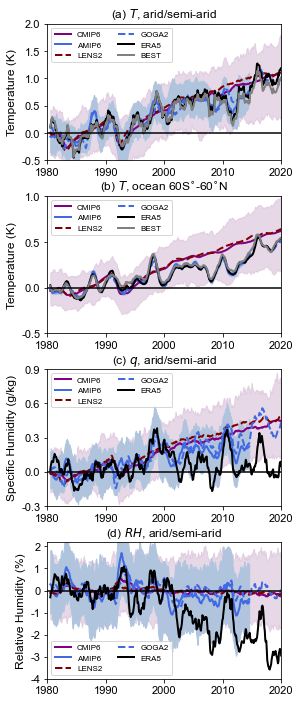

In [15]:
fig = plt.figure(figsize=(3.25,10))

ax = plotpanel(fig, 'arid', era5_t_12m, cmip6_t_12m, amip6_t_12m, lens2_t_12m, goga2_t_12m,
               trend_era5_t, trend_cmip6_t, trend_amip6_t, trend_cmip6_t_2014, trend_era5_t_2014,
               trend_lens2_t,trend_lens2_t_2014,trend_goga2_t,trend_goga2_t_2014,
               [-0.5,2.],[-0.5,0,0.5,1,1.5,2],['-0.5','0.0','0.5','1.0','1.5','2.0'],
               '(a) $T$, arid/semi-arid','Temperature (K)',0.0,1.,0.78,0.97, best = best_t_12m, best_trend = trend_best_t, best_trend_2014 = trend_best_t_2014) 


ax = plotpanel(fig, 'ocean_60sn', era5_t_12m, cmip6_t_12m, amip6_t_12m, lens2_t_12m, goga2_t_12m,
               trend_era5_t, trend_cmip6_t, trend_amip6_t, trend_cmip6_t_2014, trend_era5_t_2014,
               trend_lens2_t,trend_lens2_t_2014,trend_goga2_t,trend_goga2_t_2014,
               [-0.5,1],[-0.5,0,0.5,1],['-0.5','0.0','0.5','1.0'],
               '(b) $T$, ocean 60S$^{\circ}$-60$^{\circ}$N','Temperature (K)',0.0,1.,0.54,0.73, best = best_t_12m, best_trend = trend_best_t, best_trend_2014 = trend_best_t_2014) 


ax = plotpanel(fig, 'arid', era5_q_12m, cmip6_q_12m, amip6_q_12m, lens2_q_12m, goga2_q_12m,
               trend_era5_q, trend_cmip6_q, trend_amip6_q, trend_cmip6_q_2014, trend_era5_q_2014,
               trend_lens2_q,trend_lens2_q_2014,trend_goga2_q,trend_goga2_q_2014,
               [-0.3,0.9],[-0.3,0,0.3,0.6,0.9],['-0.3','0.0','0.3','0.6','0.9'],
               '(c) $q$, arid/semi-arid','Specific Humidity (g/kg)',0.0,1.,0.3,0.49) 

ax = plotpanel(fig, 'arid', era5_relhum_12m, cmip6_relhum_12m, amip6_relhum_12m, lens2_relhum_12m, goga2_relhum_12m,
               trend_era5_relhum, trend_cmip6_relhum, trend_amip6_relhum, trend_cmip6_relhum_2014, trend_era5_relhum_2014,
               trend_lens2_relhum,trend_lens2_relhum_2014,trend_goga2_relhum,trend_goga2_relhum_2014,
               [-4,2.2],[-4,-3,-2,-1,0,1,2],['-4','-3','-2','-1','0','1','2'],
               '(d) $RH$, arid/semi-arid','Relative Humidity (%)',0.0,1.,0.06,0.25, legendloc='lower left') 


fig.savefig(plotpath+'fig5.pdf', bbox_inches='tight', facecolor='white')
fig.savefig(plotpath+'fig5.png', bbox_inches='tight', facecolor='white')

In [84]:
print(era5_t_12m)

<xarray.Dataset>
Dimensions:     (time: 492)
Coordinates:
  * time        (time) datetime64[ns] 1980-01-01 1980-02-01 ... 2020-12-01
Data variables:
    global      (time) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    ocean       (time) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    ocean_60sn  (time) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    allland     (time) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    arid        (time) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    humid       (time) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    hyperarid   (time) float64 nan nan nan nan nan nan ... nan nan nan nan nan
